## Importing Data

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df=pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
type(df.values)

numpy.ndarray

In [5]:
data = df.values
print(data[0])

['Photo Editor & Candy Camera & Grid & ScrapBook' 'ART_AND_DESIGN' 4.1
 '159' '19M' '10,000+' 'Free' '0' 'Everyone' 'Art & Design'
 'January 7, 2018' '1.0.0' '4.0.3 and up']


In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

## Data Cleaning

### Ranking

In [7]:
index_remove = []
for idx, val in enumerate(df['Rating']):
    if val < 0 or val > 5:
        df['Rating'][idx] = 5
    if val < 3:
        df['Rating'][idx] = 2
    elif val < 4:
        df['Rating'][idx] = 3
    elif val < 4.5:
        df['Rating'][idx] = 4
    elif val <= 5:
        df['Rating'][idx] = 5
    else:
        index_remove.append(idx)

/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [8]:
df = df.drop(index_remove)

<IPython.core.display.Javascript object>


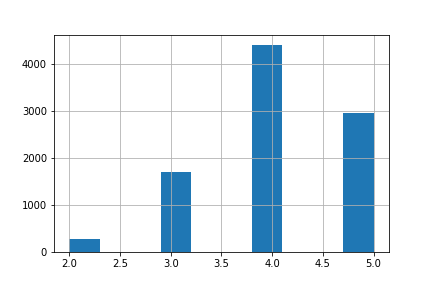

In [9]:
df['Rating'].hist()

In [10]:
features = ['Category', 'Content Rating', 'Type', 'Android Ver']
for f in features:
    set_ = set(df[f])
    print(f , list(set_))

Category ['GAME', 'HOUSE_AND_HOME', 'FINANCE', 'ART_AND_DESIGN', 'MEDICAL', 'SOCIAL', 'ENTERTAINMENT', 'EDUCATION', 'AUTO_AND_VEHICLES', 'FAMILY', 'NEWS_AND_MAGAZINES', 'EVENTS', 'WEATHER', 'TOOLS', 'PARENTING', 'LIFESTYLE', 'LIBRARIES_AND_DEMO', 'BEAUTY', 'SPORTS', 'PERSONALIZATION', 'BUSINESS', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'HEALTH_AND_FITNESS', 'TRAVEL_AND_LOCAL', 'DATING', 'COMMUNICATION', 'SHOPPING', 'VIDEO_PLAYERS', 'COMICS', 'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK', 'BOOKS_AND_REFERENCE']
Content Rating ['Adults only 18+', 'Mature 17+', 'Everyone 10+', 'Teen', 'Everyone', 'Unrated']
Type ['Free', 'Paid']
Android Ver [nan, '5.0 - 6.0', 'Varies with device', '2.0.1 and up', '2.3 and up', '6.0 and up', '4.3 and up', '5.0 - 8.0', '5.0 and up', '3.2 and up', '2.1 and up', '2.0 and up', '3.0 and up', '4.0 and up', '7.1 and up', '4.0.3 and up', '7.0 and up', '1.6 and up', '4.4 and up', '4.4W and up', '5.1 and up', '2.2 and up', '3.1 and up', '4.1 and up', '1.0 and up', '1.5 and up', '2

### Sizes

In [11]:
def preprocess_size(sizes):
    sizes = sizes.apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)
    sizes = sizes.apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
    sizes = sizes.apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
    sizes = sizes.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
    sizes = sizes.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
    sizes = sizes.apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
    sizes = sizes.apply(lambda x: float(x))
    return sizes

In [12]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9366, dtype: object

In [13]:
df['Size'] = preprocess_size(df['Size'])

In [14]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     0.0
10840    19.0
Name: Size, Length: 9366, dtype: float64

### Installs

In [15]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9366, dtype: object

In [16]:
def preprocess_install(installs):
    installs = installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
    installs = installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
    installs = installs.apply(lambda x: int(x))
    return installs

In [17]:
df['Installs']  = preprocess_install(df['Installs'])

### Types

In [18]:
def preprocess_type(types):
    types = types.apply(lambda x: x.replace('Free', '0') if 'Free' in str(x) else '1')
    return types.apply(lambda x: int(x))

In [19]:
df['Type'] = preprocess_type(df['Type'])

In [20]:
df['Type'].value_counts()

0    8719
1     647
Name: Type, dtype: int64

### Content Rating

In [21]:
df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [22]:
def preprocess_content_rating(crs):
    crs = crs.apply(lambda x: x.replace('Unrated', 'Everyone') if 'Unrated' in str(x) else x)
    crs = crs.apply(lambda x: x.replace('Adults only 18+', 'Mature') if 'Adults only 18+' in str(x) else x)
    crs = crs.apply(lambda x: x.replace('Everyone 10+', 'Mature') if 'Everyone 10+' in str(x) else x)
    crs = crs.apply(lambda x: x.replace('Mature 17+', 'Mature') if 'Mature 17+' in str(x) else x)
    return crs

In [23]:
df['Content Rating'] = preprocess_content_rating(df['Content Rating'])

In [24]:
df['Content Rating'].value_counts()

Everyone    7421
Teen        1084
Mature       861
Name: Content Rating, dtype: int64

In [25]:
df.describe()

,Rating,Size,Installs,Type
count,9366.000000,9366.000000,9.366000e+03,9366.000000
mean,4.071535,18.945051,1.789744e+07,0.069080
std,0.784668,23.013721,9.123822e+07,0.253603
min,2.000000,0.000000,1.000000e+00,0.000000
25%,4.000000,2.400000,1.000000e+04,0.000000
50%,4.000000,9.500000,5.000000e+05,0.000000
75%,5.000000,27.000000,5.000000e+06,0.000000
max,5.000000,100.000000,1.000000e+09,1.000000


In [26]:
del df['App']
del df['Price']
del df['Genres']
del df['Android Ver']
del df['Current Ver']

In [27]:
df

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated
0,ART_AND_DESIGN,4.0,159,19.0,10000,0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.0,967,14.0,500000,0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,5.0,87510,8.7,5000000,0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,5.0,215644,25.0,50000000,0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.0,967,2.8,100000,0,Everyone,"June 20, 2018"
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500,0,Everyone,"June 18, 2017"
10836,FAMILY,5.0,38,53.0,5000,0,Everyone,"July 25, 2017"
10837,FAMILY,5.0,4,3.6,100,0,Everyone,"July 6, 2018"
10839,BOOKS_AND_REFERENCE,5.0,114,0.0,1000,0,Mature,"January 19, 2015"


In [28]:
import datetime

### Last Updated

In [29]:
def preprocess_last_updated(dates):
    days = [] 
    time1 = datetime.datetime.today()
    for date in dates:
        last_updated = datetime.datetime.strptime(date, "%B %d, %Y")
        days.append((time1 - last_updated).days)
    return days

In [30]:
df['Last Updated'] = preprocess_last_updated(df['Last Updated'])

In [31]:
df.dtypes

Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type                int64
Content Rating     object
Last Updated        int64
dtype: object

In [32]:
df

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated
0,ART_AND_DESIGN,4.0,159,19.0,10000,0,Everyone,733
1,ART_AND_DESIGN,3.0,967,14.0,500000,0,Everyone,725
2,ART_AND_DESIGN,5.0,87510,8.7,5000000,0,Everyone,527
3,ART_AND_DESIGN,5.0,215644,25.0,50000000,0,Teen,581
4,ART_AND_DESIGN,4.0,967,2.8,100000,0,Everyone,569
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500,0,Everyone,936
10836,FAMILY,5.0,38,53.0,5000,0,Everyone,899
10837,FAMILY,5.0,4,3.6,100,0,Everyone,553
10839,BOOKS_AND_REFERENCE,5.0,114,0.0,1000,0,Mature,1817


## Datatype Transformation

In [33]:
one_hot_encoded = pd.get_dummies(df['Content Rating'],prefix='content_rating')

In [34]:
one_hot_encoded

,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
10834,1,0,0
10836,1,0,0
10837,1,0,0
10839,0,1,0


In [35]:
new_df = df
new_df['content_rating_Everyone'] = one_hot_encoded['content_rating_Everyone']
new_df['content_rating_Mature'] = one_hot_encoded['content_rating_Mature']
new_df['content_rating_Teen'] = one_hot_encoded['content_rating_Teen']

In [36]:
del new_df['Content Rating']

In [37]:
new_df

,Category,Rating,Reviews,Size,Installs,Type,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,ART_AND_DESIGN,4.0,159,19.0,10000,0,733,1,0,0
1,ART_AND_DESIGN,3.0,967,14.0,500000,0,725,1,0,0
2,ART_AND_DESIGN,5.0,87510,8.7,5000000,0,527,1,0,0
3,ART_AND_DESIGN,5.0,215644,25.0,50000000,0,581,0,0,1
4,ART_AND_DESIGN,4.0,967,2.8,100000,0,569,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2.6,500,0,936,1,0,0
10836,FAMILY,5.0,38,53.0,5000,0,899,1,0,0
10837,FAMILY,5.0,4,3.6,100,0,553,1,0,0
10839,BOOKS_AND_REFERENCE,5.0,114,0.0,1000,0,1817,0,1,0


In [38]:
labels = new_df['Category'].astype('category').cat.categories.tolist()
mapping_labels = { label: val for label, val in zip(labels,list(range(1,len(labels)+1)))}

In [39]:
def preprocess_category(categories):
    return categories.apply(lambda x: mapping_labels[x])

In [40]:
new_df['Category'] = preprocess_category(new_df['Category'])

In [41]:
new_df['Category'].value_counts()

12    1747
15    1097
30     734
26     351
21     350
7      328
13     323
29     319
25     317
19     314
24     314
5      303
16     297
28     259
27     238
22     233
31     226
8      195
4      178
32     160
9      155
10     149
20     124
14     109
17      76
33      75
2       73
18      65
1       62
6       58
23      50
11      45
3       42
Name: Category, dtype: int64

In [42]:
new_df

,Category,Rating,Reviews,Size,Installs,Type,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,1,4.0,159,19.0,10000,0,733,1,0,0
1,1,3.0,967,14.0,500000,0,725,1,0,0
2,1,5.0,87510,8.7,5000000,0,527,1,0,0
3,1,5.0,215644,25.0,50000000,0,581,0,0,1
4,1,4.0,967,2.8,100000,0,569,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10834,12,4.0,7,2.6,500,0,936,1,0,0
10836,12,5.0,38,53.0,5000,0,899,1,0,0
10837,12,5.0,4,3.6,100,0,553,1,0,0
10839,4,5.0,114,0.0,1000,0,1817,0,1,0


In [43]:
new_df['Reviews']  = new_df['Reviews'].apply(lambda x: float(x))

In [44]:
new_df

,Category,Rating,Reviews,Size,Installs,Type,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,1,4.0,159.0,19.0,10000,0,733,1,0,0
1,1,3.0,967.0,14.0,500000,0,725,1,0,0
2,1,5.0,87510.0,8.7,5000000,0,527,1,0,0
3,1,5.0,215644.0,25.0,50000000,0,581,0,0,1
4,1,4.0,967.0,2.8,100000,0,569,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10834,12,4.0,7.0,2.6,500,0,936,1,0,0
10836,12,5.0,38.0,53.0,5000,0,899,1,0,0
10837,12,5.0,4.0,3.6,100,0,553,1,0,0
10839,4,5.0,114.0,0.0,1000,0,1817,0,1,0


## Normalizaing

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(new_df) 
new_df.loc[:,:] = scaled_values

In [46]:
new_df['Type'].value_counts()

0.0    8719
1.0     647
Name: Type, dtype: int64

In [47]:
y_labels = new_df['Type']

In [48]:
del new_df['Type']

In [49]:
new_df

,Category,Rating,Reviews,Size,Installs,Last Updated,content_rating_Everyone,content_rating_Mature,content_rating_Teen
0,0.00000,0.666667,2.021538e-06,0.190,9.999000e-06,0.070976,1.0,0.0,0.0
1,0.00000,0.333333,1.235953e-05,0.140,4.999990e-04,0.068311,1.0,0.0,0.0
2,0.00000,1.000000,1.119638e-03,0.087,4.999999e-03,0.002333,1.0,0.0,0.0
3,0.00000,1.000000,2.759054e-03,0.250,5.000000e-02,0.020327,0.0,0.0,1.0
4,0.00000,0.666667,1.235953e-05,0.028,9.999900e-05,0.016328,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10834,0.34375,0.666667,7.676727e-08,0.026,4.990000e-07,0.138620,1.0,0.0,0.0
10836,0.34375,1.000000,4.733982e-07,0.530,4.999000e-06,0.126291,1.0,0.0,0.0
10837,0.34375,1.000000,3.838364e-08,0.036,9.900000e-08,0.010996,1.0,0.0,0.0
10839,0.09375,1.000000,1.445784e-06,0.000,9.990000e-07,0.432189,0.0,1.0,0.0


## Training and Testing Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
new_df, x_test, y_labels, y_test = train_test_split(new_df, y_labels, test_size=0.20, random_state=0, stratify=y_labels)

In [52]:
y_test.value_counts()

0.0    1745
1.0     129
Name: Type, dtype: int64

In [53]:
y_labels.value_counts()

0.0    6974
1.0     518
Name: Type, dtype: int64

# Sampling

Since from the above value counts we can clearly see that we have a class imbalance problem since we have only 485 instances of minority class compared to 6539 of majority class. Therefore we will be try to solve this problem using the following three techniques; Undersampling, Oversampling and Combination of both. 

## Undersampling, Oversampling, and Combination

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 

In [55]:
undersampler = RandomUnderSampler(random_state=1)
oversampler = SMOTE(random_state=1)
mixed_sampler = SMOTEENN(random_state=1)

In [56]:
x_under, y_under = undersampler.fit_sample(new_df, y_labels)

In [57]:
x_over, y_over = oversampler.fit_resample(new_df, y_labels)

In [58]:
x_combo, y_combo = mixed_sampler.fit_sample(new_df, y_labels)

In [59]:
np.bincount(y_under.astype(int))

array([518, 518])

In [60]:
np.bincount(y_over.astype(int))

array([6974, 6974])

In [61]:
np.bincount(y_combo.astype(int))

array([4968, 5619])

## Evaluation Metrics

In [62]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [63]:
plt.style.use('ggplot')
%matplotlib inline
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [68]:
def evaluate_model(classifier, x_values, y_values):
    y_pred = cross_val_predict(classifier, x_values, y_values, cv=10)
    print('Accuracy: ', accuracy_score(y_values, y_pred))
    print('Confusion Matrix: ', confusion_matrix(y_values, y_pred))
    print('F1 Score: ',f1_score(y_values, y_pred))
    print('Precision: ',precision_score(y_values, y_pred))
    print('Recall: ',recall_score(y_values, y_pred))
    fpr, tpr, thresholds = roc_curve(y_values, y_pred)
    plot_roc_curve(fpr, tpr)
    print('AUC Score is: ', roc_auc_score(y_values, y_pred))
    return cross_val_score(tree_classifier, x_values, y_values, scoring='accuracy', cv=10)

# Models and Training

## Decision Tree

In [69]:
tree_classifier = tree.DecisionTreeClassifier()

### Undersampling

Accuracy:  0.7944015444015444
Confusion Matrix:  [[403 115]
 [ 98 420]]
F1 Score:  0.7977207977207977
Precision:  0.7850467289719626
Recall:  0.8108108108108109


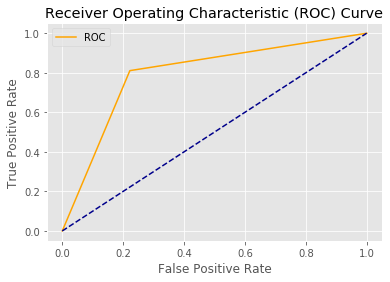

AUC Score is:  0.7944015444015444


In [74]:
dt_results = evaluate_model(tree_classifier, x_under, y_under)

### Oversampling

Accuracy:  0.9450817321479782
Confusion Matrix:  [[6552  422]
 [ 344 6630]]
F1 Score:  0.9453871381719663
Precision:  0.9401588201928531
Recall:  0.950673931746487


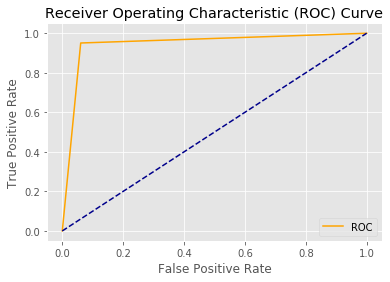

AUC Score is:  0.9450817321479781


In [75]:
dt_results = evaluate_model(tree_classifier, x_over, y_over)

### Combination of Sampling

Accuracy:  0.957495041088127
Confusion Matrix:  [[4702  266]
 [ 184 5435]]
F1 Score:  0.9602473498233215
Precision:  0.9533415190317488
Recall:  0.9672539597793202


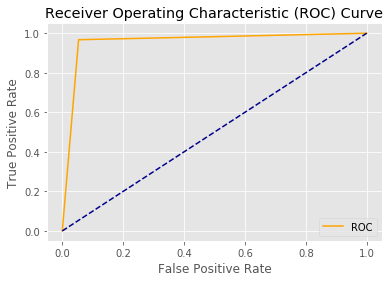

AUC Score is:  0.9568556433357148


In [76]:
dt_results = evaluate_model(tree_classifier, x_combo, y_combo)

## Naive Based


In [77]:
from sklearn.naive_bayes import GaussianNB
naive_based = GaussianNB()

### Undersampling

Accuracy:  0.6814671814671814
Confusion Matrix:  [[190 328]
 [  2 516]]
F1 Score:  0.7577092511013216
Precision:  0.6113744075829384
Recall:  0.9961389961389961


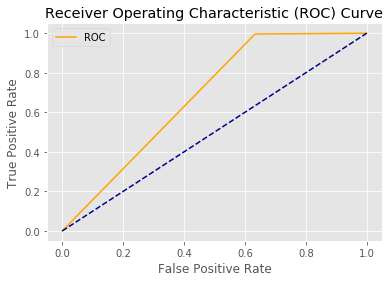

AUC Score is:  0.6814671814671815


In [78]:
nb_results = evaluate_model(naive_based, x_under, y_under)

### Oversampling

Accuracy:  0.6593059936908517
Confusion Matrix:  [[2273 4701]
 [  51 6923]]
F1 Score:  0.7444886546940531
Precision:  0.5955781142463867
Recall:  0.9926871236019501


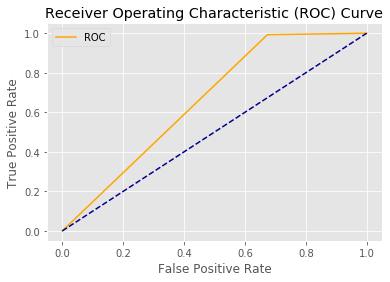

AUC Score is:  0.6593059936908517


In [79]:
nb_results = evaluate_model(naive_based, x_over, y_over)

### Combination of sampling

Accuracy:  0.7056767734013413
Confusion Matrix:  [[1895 3073]
 [  43 5576]]
F1 Score:  0.7816091954022988
Precision:  0.6446988091108798
Recall:  0.992347392774515


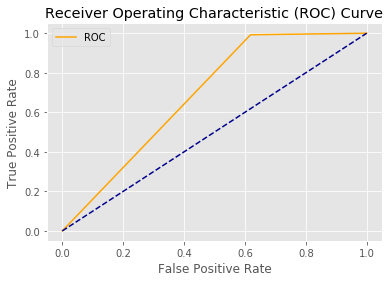

AUC Score is:  0.6868943083035216


In [80]:
nb_results = evaluate_model(naive_based, x_combo, y_combo)

## k-nearnest Neighbours 

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_5 = KNeighborsClassifier(n_neighbors = 5)

### Undersampling

kNN with 3 Neighbours
Accuracy:  0.6216216216216216
Confusion Matrix:  [[309 209]
 [183 335]]
F1 Score:  0.6308851224105462
Precision:  0.6158088235294118
Recall:  0.6467181467181468


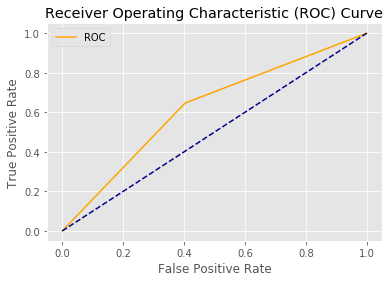

AUC Score is:  0.6216216216216217
kNN with 5 Neighbours
Accuracy:  0.6216216216216216
Confusion Matrix:  [[304 214]
 [178 340]]
F1 Score:  0.6343283582089553
Precision:  0.6137184115523465
Recall:  0.6563706563706564


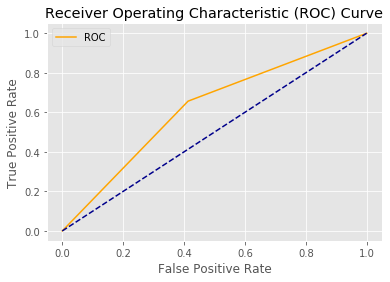

AUC Score is:  0.6216216216216216


In [82]:
print('kNN with 3 Neighbours')
kn3_results = evaluate_model(knn_3, x_under, y_under)
print('kNN with 5 Neighbours')
kn5_results = evaluate_model(knn_5, x_under, y_under)

### Oversampling

kNN with 3 Neighbours
Accuracy:  0.8785488958990536
Confusion Matrix:  [[5684 1290]
 [ 404 6570]]
F1 Score:  0.8858028852635836
Precision:  0.8358778625954199
Recall:  0.9420705477487812


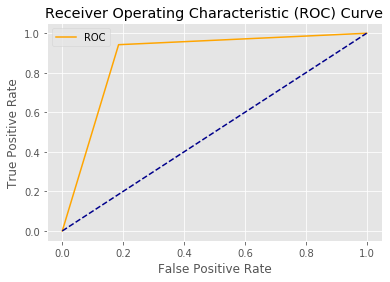

AUC Score is:  0.8785488958990536
kNN with 5 Neighbours
Accuracy:  0.8622741611700602
Confusion Matrix:  [[5502 1472]
 [ 449 6525]]
F1 Score:  0.8716852581657872
Precision:  0.8159309741152933
Recall:  0.9356180097505019


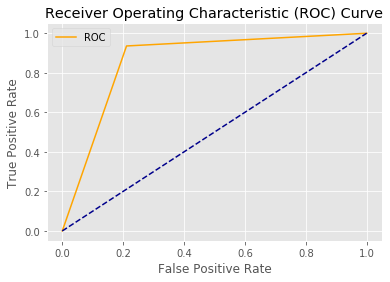

AUC Score is:  0.8622741611700603


In [83]:
print('kNN with 3 Neighbours')
kn3_results = evaluate_model(knn_3, x_over, y_over)
print('kNN with 5 Neighbours')
kn5_results = evaluate_model(knn_5, x_over, y_over)

### Combination of Sampling

kNN with 3 Neighbours
Accuracy:  0.9833758382922452
Confusion Matrix:  [[4821  147]
 [  29 5590]]
F1 Score:  0.9845015850651638
Precision:  0.9743768520132473
Recall:  0.994838939313045


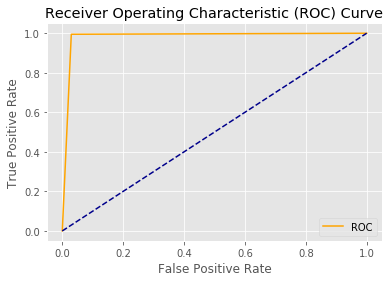

AUC Score is:  0.9826247836661843
kNN with 5 Neighbours
Accuracy:  0.9676017757627279
Confusion Matrix:  [[4693  275]
 [  68 5551]]
F1 Score:  0.9700305810397554
Precision:  0.9527978029522829
Recall:  0.9878982025271401


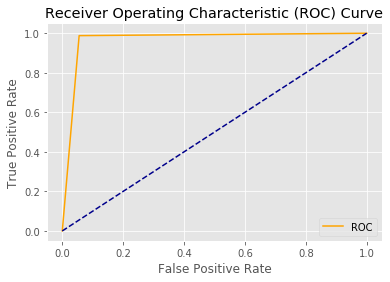

AUC Score is:  0.9662719676081756


In [84]:
print('kNN with 3 Neighbours')
kn3_results = evaluate_model(knn_3, x_combo, y_combo)
print('kNN with 5 Neighbours')
kn5_results = evaluate_model(knn_5, x_combo, y_combo)

## Linear Classifier

In [85]:
from sklearn.linear_model import SGDClassifier

### Undersampling

/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

Accuracy:  0.5395752895752896
Confusion Matrix:  [[297 221]
 [256 262]]
F1 Score:  0.5234765234765235
Precision:  0.5424430641821946
Recall:  0.5057915057915058


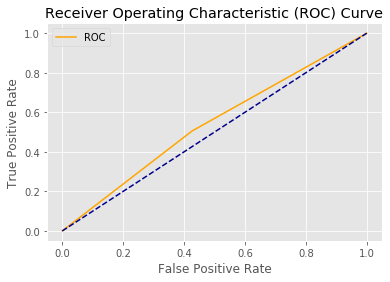

AUC Score is:  0.5395752895752897


In [86]:
linear_under = SGDClassifier(max_iter=1, learning_rate='optimal')
linear_under.fit(x_under, y_under)
sgd_results = evaluate_model(linear_under, x_under, y_under)

### Oversampling

/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

Accuracy:  0.5713363923143103
Confusion Matrix:  [[4244 2730]
 [3249 3725]]
F1 Score:  0.554769528632065
Precision:  0.5770720371804803
Recall:  0.5341267565242329


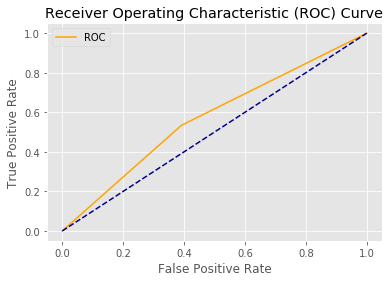

AUC Score is:  0.5713363923143103


In [88]:
linear_over = SGDClassifier(max_iter=1, learning_rate='optimal')
linear_over.fit(x_over, y_over)
sgd_results = evaluate_model(linear_over, x_over, y_over)

### Combination of Sampling

/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

Accuracy:  0.6327571550014168
Confusion Matrix:  [[2443 2525]
 [1363 4256]]
F1 Score:  0.6864516129032259
Precision:  0.6276360418817284
Recall:  0.7574301477131162


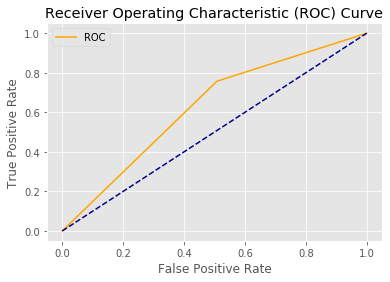

AUC Score is:  0.6245886648388447


In [89]:
linear_combo = SGDClassifier(max_iter=1, learning_rate='optimal')
linear_combo.fit(x_combo, y_combo)
sgd_results = evaluate_model(linear_combo, x_combo, y_combo)

## Ensemble

## BaggingClassifier

In [90]:
from sklearn.ensemble import BaggingClassifier

### Undersampling

Accuracy:  0.8137065637065637
Confusion Matrix:  [[414 104]
 [ 89 429]]
F1 Score:  0.8163653663177926
Precision:  0.8048780487804879
Recall:  0.8281853281853282


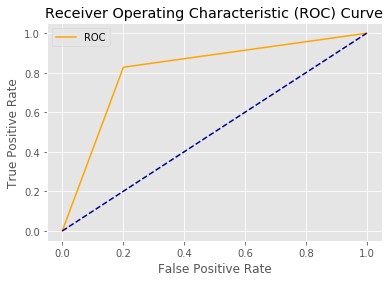

AUC Score is:  0.8137065637065637


In [91]:
under_bagging = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
under_bagging = under_bagging.fit(x_under, y_under)
bagging_results = evaluate_model(under_bagging, x_under, y_under)

### Oversampling

Accuracy:  0.9614998566102667
Confusion Matrix:  [[6671  303]
 [ 234 6740]]
F1 Score:  0.961689377184847
Precision:  0.9569785602726111
Recall:  0.9664468024089475


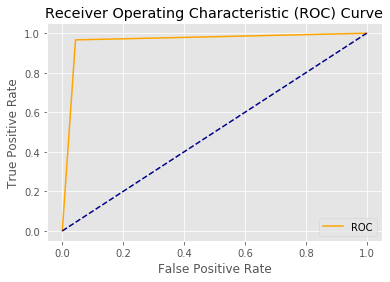

AUC Score is:  0.9614998566102668


In [92]:
over_bagging = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
over_bagging = over_bagging.fit(x_over, y_over)
bagging_results = evaluate_model(over_bagging, x_over, y_over)

### Combination of Sampling

Accuracy:  0.9700576178331917
Confusion Matrix:  [[4771  197]
 [ 120 5499]]
F1 Score:  0.9719840919133893
Precision:  0.9654143258426966
Recall:  0.9786438868126001


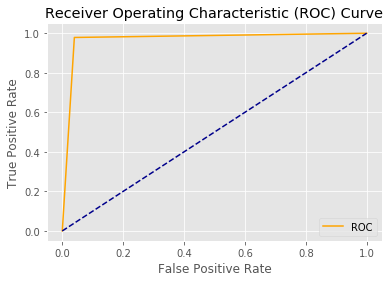

AUC Score is:  0.9694950512967994


In [93]:
combo_bagging = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
combo_bagging = combo_bagging.fit(x_combo, y_combo)
bagging_results = evaluate_model(combo_bagging, x_combo, y_combo)

## Feature Selection

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
random_forest = RandomForestClassifier(n_estimators=20)
random_forest.fit(x_combo, y_combo)
print(random_forest.feature_importances_)

[0.10156394 0.04144634 0.15861482 0.07621253 0.44750945 0.1493799
 0.01063439 0.0074435  0.00719513]


In [96]:
x_combo = np.delete(x_combo, -1, 1)
x_combo = np.delete(x_combo, -1, 1)
x_combo = np.delete(x_combo, -1, 1)
x_combo = np.delete(x_combo, 1, 1)

In [97]:
x_combo.shape

(10587, 5)

### Decision Tree

Accuracy:  0.9541890998394257
Confusion Matrix:  [[4678  290]
 [ 195 5424]]
F1 Score:  0.957204623665402
Precision:  0.9492474623731186
Recall:  0.9652963160704752


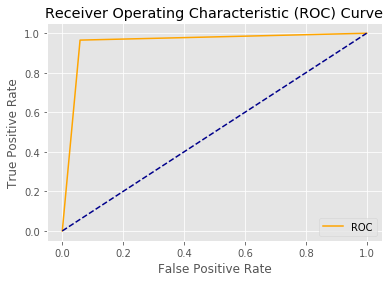

AUC Score is:  0.9534613625440942


array([0.89612842, 0.96600567, 0.9631728 , 0.95845137, 0.96789424,
       0.95561851, 0.95089707, 0.96883853, 0.96880907, 0.95837275])

In [98]:
evaluate_model(tree_classifier, x_combo, y_combo)

### Naive Bayes

Accuracy:  0.7053934070085954
Confusion Matrix:  [[1892 3076]
 [  43 5576]]
F1 Score:  0.7814448882348819
Precision:  0.6444752658344891
Recall:  0.992347392774515


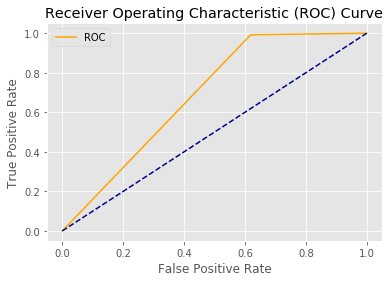

AUC Score is:  0.6865923759363719


array([0.89612842, 0.96033994, 0.96222852, 0.95939566, 0.96600567,
       0.95467422, 0.96128423, 0.96789424, 0.963138  , 0.9602649 ])

In [99]:
evaluate_model(naive_based, x_combo, y_combo)

## kNN

Accuracy:  0.9061112685368848
Confusion Matrix:  [[4224  744]
 [ 250 5369]]
F1 Score:  0.91527446300716
Precision:  0.878292164240144
Recall:  0.9555080975262502


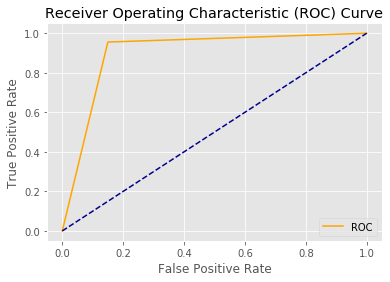

AUC Score is:  0.902874821709985
Accuracy:  0.8916595825068481
Confusion Matrix:  [[4105  863]
 [ 284 5335]]
F1 Score:  0.902936447490903
Precision:  0.8607615359793481
Recall:  0.9494571987898203


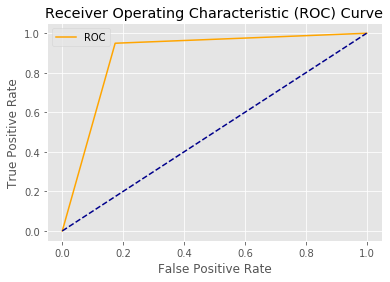

AUC Score is:  0.887872721778163


array([0.89990557, 0.95939566, 0.96411709, 0.9565628 , 0.96694995,
       0.9490085 , 0.9565628 , 0.96694995, 0.963138  , 0.95742668])

In [100]:
evaluate_model(knn_3, x_combo, y_combo)
evaluate_model(knn_5, x_combo, y_combo)

### Linear Classifier

/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit

Accuracy:  0.6366298290356097
Confusion Matrix:  [[2584 2384]
 [1463 4156]]
F1 Score:  0.6836088494119582
Precision:  0.635474006116208
Recall:  0.7396333867236163


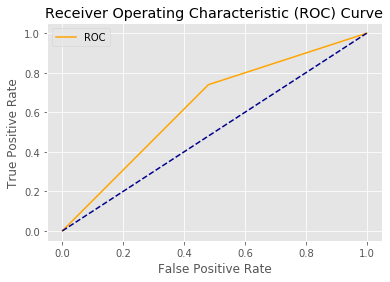

AUC Score is:  0.6298811056001334


array([0.89707271, 0.95845137, 0.96411709, 0.95939566, 0.96789424,
       0.95372993, 0.95278565, 0.96600567, 0.96597353, 0.9602649 ])

In [101]:
linear_combo = SGDClassifier(max_iter=1, learning_rate='optimal')
linear_combo.fit(x_combo, y_combo)
evaluate_model(linear_combo, x_combo, y_combo)

### Ensembler

Accuracy:  0.9676017757627279
Confusion Matrix:  [[4766  202]
 [ 141 5478]]
F1 Score:  0.9696433312682539
Precision:  0.9644366197183099
Recall:  0.9749065670048052


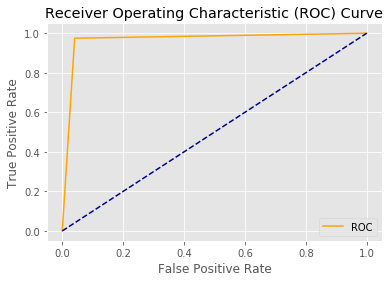

AUC Score is:  0.9671231707809855


array([0.90273843, 0.96411709, 0.9631728 , 0.95561851, 0.96600567,
       0.95089707, 0.95845137, 0.96789424, 0.97069943, 0.95837275])

In [102]:
combo_bagging = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
combo_bagging = combo_bagging.fit(x_combo, y_combo)
evaluate_model(combo_bagging, x_combo, y_combo)

## Scope Rules on Original Preprocessed Dataset

In [103]:
from skrules import SkopeRules

/home/kuldeep/Documents/CNN/cnn/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [104]:
new_df = pd.DataFrame(new_df, columns=new_df.columns)

In [105]:
new_df.rename(columns={'Last Updated': 'last_updated'}, inplace=True)

In [106]:
feature_names = list(new_df.columns)
clf = SkopeRules(max_depth_duplication=10,
                 n_estimators=20,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

In [107]:
clf.fit(new_df, y_labels)

SkopeRules(bootstrap=False, bootstrap_features=False,
           feature_names=['Category', 'Rating', 'Reviews', 'Size', 'Installs',
                          'last_updated', 'content_rating_Everyone',
                          'content_rating_Mature', 'content_rating_Teen'],
           max_depth=3, max_depth_duplication=10, max_features=1.0,
           max_samples=0.8, max_samples_features=1.0, min_samples_split=2,
           n_estimators=20, n_jobs=1, precision_min=0.3, random_state=None,
           recall_min=0.1, verbose=0)

In [108]:
skope_rules_scoring = clf.score_top_rules(new_df)

In [109]:
clf.rules_

[('Installs <= 2.9998999252711656e-05 and Reviews > 4.222200004733168e-06 and Size > 0.012500000186264515',
  (0.4129032258064516, 0.1549636803874092, 1)),
 ('Installs <= 7.499899948015809e-05 and Reviews <= 1.6927183423831593e-05 and last_updated > 0.358713760972023',
  (0.3385416666666667, 0.15892420537897312, 1)),
 ('Installs <= 2.9998999252711656e-05 and Reviews <= 1.8686433577386197e-05 and Reviews > 4.2413919345563045e-06',
  (0.3933333333333333, 0.14251207729468598, 1)),
 ('Installs <= 7.49900004848314e-06 and last_updated > 0.358713760972023',
  (0.4864864864864865, 0.1291866028708134, 1)),
 ('Installs <= 2.9998999252711656e-05 and Installs > 7.49900004848314e-06 and Reviews > 4.196611143925111e-06',
  (0.36538461538461536, 0.13902439024390245, 1))]

In [110]:
## Credits: https://github.com/scikit-learn-contrib/skope-rules/blob/master/notebooks/demo_titanic.ipynb
def compute_y_pred_from_query(X, rule):
    score = np.zeros(X.shape[0])
    X = X.reset_index(drop=True)
    score[list(X.query(rule).index)] = 1
    return(score)

def compute_performances_from_y_pred(y_true, y_pred, index_name='default_index'):
    df = pd.DataFrame(data=
        {
            'accuracy': [sum(y_pred)/sum(y_true)],
            'precision':[sum(y_true * y_pred)/sum(y_pred)],
            'recall':[sum(y_true * y_pred)/sum(y_true)]
        },
        index=[index_name],
        columns=['accuracy', 'precision', 'recall']
    )
    return(df)

def compute_train_test_query_performances(X_train, y_train, rule):
    
    y_train_pred = compute_y_pred_from_query(X_train, rule)
#     y_test_pred = compute_y_pred_from_query(x_test, rule)
    performances = None
    performances = pd.concat([
        performances,
                compute_performances_from_y_pred(y_train, y_train_pred, 'train_set')],
        axis=0)
#     performances = pd.concat([
#         performances,
#         compute_performances_from_y_pred(y_test, y_test_pred, 'test_set')],
#         axis=0)
    return(performances)

for i in range(len(clf.rules_)):
    print('Rule '+str(i+1)+':')
    display(compute_train_test_query_performances(new_df, y_labels, clf.rules_[i][0])
)

Rule 1:


,accuracy,precision,recall
train_set,0.3861,0.38,0.146718


Rule 2:


,accuracy,precision,recall
train_set,0.478764,0.330645,0.158301


Rule 3:


,accuracy,precision,recall
train_set,0.368726,0.382199,0.140927


Rule 4:


,accuracy,precision,recall
train_set,0.272201,0.468085,0.127413


Rule 5:


,accuracy,precision,recall
train_set,0.389961,0.386139,0.150579


## Paired T-Test

In [111]:
from scipy import stats

In [116]:
def paired_ttest(p_value):
    if p>0.05:
        print(' No significant difference. p value is {}'.format(p))
    else:
        print(' There is a significant difference. p value is {}'.format(p))

### Decision Tree and Naive Bayes

In [117]:
t, p = stats.ttest_ind(dt_results , nb_results)
paired_ttest(p)

 No significant difference. p value is 0.999974913243652


### Decision Tree and kNN

In [120]:
t, p = stats.ttest_ind(dt_results , kn3_results)
paired_ttest(p)
t, p = stats.ttest_ind(dt_results , kn5_results)
paired_ttest(p)

 No significant difference. p value is 0.9907959911885996
 No significant difference. p value is 0.9911031695362924


### Decision Tree and SGD Classifier

In [123]:
t, p = stats.ttest_ind(dt_results , sgd_results)
paired_ttest(p)

 No significant difference. p value is 0.9543834887240188


### Decision Tree and Ensemble

In [125]:
t, p = stats.ttest_ind(dt_results , bagging_results)
paired_ttest(p)

 No significant difference. p value is 0.9078490065118854


### Naive Bayes and kNN

In [139]:
t, p = stats.ttest_ind(nb_results , kn3_results)
paired_ttest(p)
t, p = stats.ttest_ind(nb_results , kn5_results)
paired_ttest(p)

 No significant difference. p value is 0.991055762645799
 No significant difference. p value is 0.9913412133158874


### Naive Bayes and SGD

In [140]:
t, p = stats.ttest_ind(nb_results , sgd_results)
paired_ttest(p)

 No significant difference. p value is 0.9555456707807908


### Naive Bayes and Ensemble

In [141]:
t, p = stats.ttest_ind(nb_results , bagging_results)
paired_ttest(p)

 No significant difference. p value is 0.9101583572193076


### SGD and knn

In [142]:
t, p = stats.ttest_ind(sgd_results , kn3_results)
paired_ttest(p)
t, p = stats.ttest_ind(sgd_results, kn5_results)
paired_ttest(p)

 No significant difference. p value is 0.9628270595750033
 No significant difference. p value is 0.9639549344193776


### SGD and Ensemble 

In [143]:
t, p = stats.ttest_ind(sgd_results , bagging_results)
paired_ttest(p)

 No significant difference. p value is 0.8612456446452027


### ensemble and knn

In [144]:
t, p = stats.ttest_ind(bagging_results , kn3_results)
paired_ttest(p)
t, p = stats.ttest_ind(bagging_results, kn5_results)
paired_ttest(p)

 No significant difference. p value is 0.8968782395181271
 No significant difference. p value is 0.9001531385816492
